<a href="https://colab.research.google.com/github/Panagiotis-Bosinas/Machine_Learning_Assignments/blob/main/Ergasia_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ερωτήματα

# Import Libraries

In [129]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

Load Data

In [130]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)
df =df.drop(['Volume', 'Dividends' , 'Stock Splits'],axis=1)
df

,Date,Open,High,Low,Close
0,2020-11-03 00:00:00-05:00,94.050003,94.050003,93.290001,93.550003
1,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004
2,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
3,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
4,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
...,...,...,...,...,...
1253,2025-10-28 00:00:00-04:00,98.750000,98.949997,98.570000,98.690002
1254,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001
1255,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1256,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003


## Ερώτημα 1

In [131]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], name='Open'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], name='High'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], name='Low'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close'))

fig.update_layout(title='U.S. Dollar Index', xaxis_title='Data', yaxis_title='Index (Open, High, Low, Close)')

fig.show()



Στατική εικόνα για να εμφανίζεται στο Github

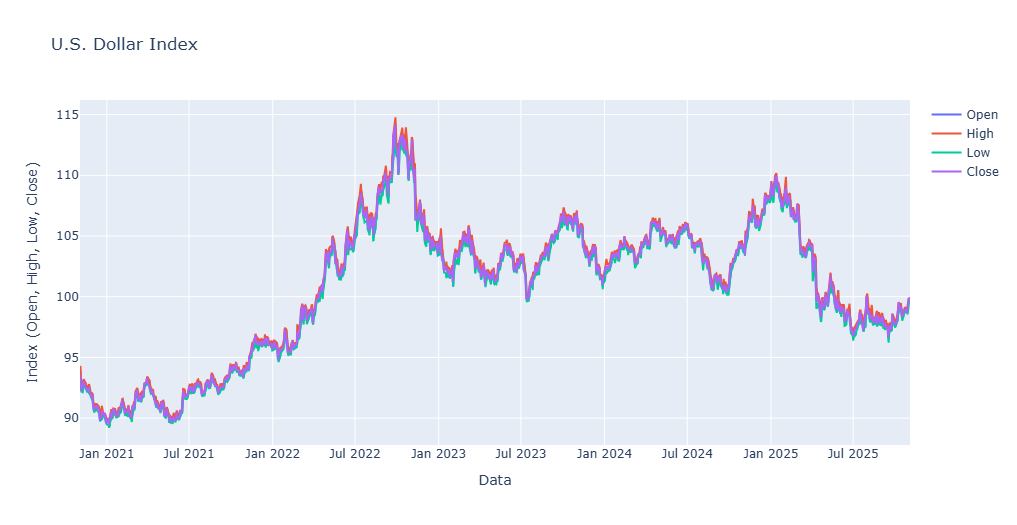

## Ερώτημα 2

Οι χρονοσειρές είναι εμφανώς μη στατικές, αφού ο μέσος όρος, το variance και το covariance δεν είναι σταθερά στον χρόνο.

## Ερώτημα 3

Εφόσον οι μη στατικές χρονοσειρές έχουν μεταβαλλόμενο μέσο όρο και variance, ένας regressor θα δυσκολευόταν να προβλέψει τις μελλοντικές τάσεις της χρονοσειράς, αφού στην πραγματικότητα οι τάσεις αυτές εξαρτόνται από πολλούς και απρόβλεπτους παράγοντες. Επιπλέον, το μοντέλο πιθανώς να εξάγει σχέση αιτιότητας μεταξύ δύο ανεξάρτητων στην πραγματικότητα τιμών, απλά επειδή εμφνίζουν αυξητική τάση την ίδια χρονική περίοδο.

## Ερώτημα 4

Τον Ιούνιο και τον Ιούλιο του 2025 το δολάριο εμφανίζει έντονα πτωτική τάση. Αυτό οφείλεται στις απειλές για επιπλέον δασμούς του  Donald Trump σε πολλές χώρες της Ασίας, τον Καναδά και την Βραζιλία. Επιπλέον, τότε τέθηκε σε ισχύ το One Big Beautiful Bill Act, που μεταξύ άλλων αύξησε το όριο δανεισμού του Αμερικανικού κράτους κατά τρισεκαττομύρια δολάρια. Ως αποτέλεσμα, πολλοί έχασαν την εμπιστοσύνη τους στις αμερικανικές αγορές φοβούμενοι τις συνέπειες και τελικά το δολάριο εμφάνισε περαιτέρω πτώση.

## Ερώτημα 5

Μιας και η πρόβλεψη θα αφορά το άμεσο μέλλον, ίσως είναι δυνατή η εκτίμηση με μία συνάρτηση f που έχει ως είσοδο τα σημερινά δεδομένα, αφού το σφάλμα λόγω απρόβλεπτων παραγώντων δεν θα είναι τόσο μεγάλο από μέρα σε μέρα.

## Ερώτημα 6

Δεν έχει νόημα ο τυχαίος διαχωρισμός των δεδομένων γιατί εξαρτώνται από τον χρόνο, οπότε θα αλλιωνόταν η μορφή της χρονοσειράς και δεν θα είχε κανένα νόημα να αποπειραθούμε να προβλέψουμε κάποια μελλοντική τιμή.

## Ερώτημα 7

In [132]:
train = df[df['Date'] < '2024-01-01']
test = df[df['Date'] >= '2024-01-01']

train = train.drop(columns=['Date'])
test = test.drop(columns=['Date'])

## Ερώτημα 8

In [133]:
def close_function(df,N):

  df['Target'] = df['Close'].shift(-1)

  df = df.dropna().reset_index(drop=True)

  x = []
  y = []
  for i in range(len(df) - N + 1):

        x_i = df.iloc[i:i+N][['Open', 'High', 'Low', 'Close']].values

        y_i = df.iloc[i+N-1]['Target']

        x.append(x_i)
        y.append(y_i)


  x_np = np.array(x)
  y_np = np.array(y)

  return x_np, y_np

Ορίζουμε την συνάρτηση, θέτουμε με την εντολή shift το close της επόμενης μέρας σαν target και αφαιρούμε την γραμμή αυτήν γιατί δεν ανήκει στο εκάστοτε timeframe. Στην συνέχεια, αποθηκεύουμε τις τιμές των μεταβλητών εισόδου και του target σε λίστες για κάθε timeframe και τα μετατρέπουμε σε numpy arrays.

## Ερώτημα 9

Όσο μεγαλύτερος θέλουμε να είναι ο ορίζοντας στον οποίο θέλουμε να γίνει η πρόβλεψη, τόσο μεγαλύτερο πρέπει να είναι το timeframe, αφού για την πρόβλεψη της επόμενης μέρας έχουν περισσότερη σημασία οι στιγμιαίες διακυμάνσεις, ενώ για μινιαία πρόβλεψη πρέπει να εξετάσουμε τα δεδομένα σε βάθος χρόνου.

## Ερώτημα 10

Καλούμε την συνάρτηση και μετατρέπουμε τα inputs σε διανύσματα

In [134]:
N=5
x_train, y_train = close_function(train, N)
x_test, y_test = close_function(test, N)

x_train = x_train.reshape(x_train.shape[0], N*4)
x_test = x_test.reshape(x_test.shape[0], N*4)

x_train.shape, y_train.shape

((789, 20), (789,))

Βλέπουμε ότι το πλήθος των inputs είναι πράγματι ίσο με το πλήθος των targets.

In [135]:
x_train[0]

array([94.05000305, 94.05000305, 93.29000092, 93.55000305, 93.08999634,
       94.30000305, 93.08999634, 93.41000366, 93.33999634, 93.55000305,
       92.48999786, 92.52999878, 92.56999969, 92.81999969, 92.18000031,
       92.23000336, 92.23999786, 92.95999908, 92.12999725, 92.73000336])

## Ερώτημα 11

a) Linear Regressor

In [136]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
ypred_a_train = lin_reg.predict(x_train)
ypred_a_test = lin_reg.predict(x_test)
MAE_a_train = mean_absolute_error(y_train, ypred_a_train)
MAE_a_test = mean_absolute_error(y_test, ypred_a_test)

b) Random Forest

In [137]:
seed = 0
forest = RandomForestRegressor(random_state=seed)
forest.fit(x_train,y_train)
ypred_b_train = forest.predict(x_train)
ypred_b_test = forest.predict(x_test)
MAE_b_train = mean_absolute_error(y_train, ypred_b_train)
MAE_b_test = mean_absolute_error(y_test, ypred_b_test)

c) Bagging σε Linear Regressor

In [138]:
bag = BaggingRegressor(estimator=LinearRegression(), random_state=seed)
bag.fit(x_train,y_train)
ypred_c_train = bag.predict(x_train)
ypred_c_test = bag.predict(x_test)
MAE_c_train = mean_absolute_error(y_train, ypred_c_train)
MAE_c_test = mean_absolute_error(y_test, ypred_c_test)

d) XG Boost

In [139]:
xgboost = xgb.XGBRegressor(random_state = seed)
xgboost.fit(x_train,y_train)
ypred_d_train = xgboost.predict(x_train)
ypred_d_test = xgboost.predict(x_test)
MAE_d_train = mean_absolute_error(y_train, ypred_d_train)
MAE_d_test = mean_absolute_error(y_test, ypred_d_test)

e) Stacking με Linear Regressor και Decision Tree

In [140]:
estimators = [('lin_reg', LinearRegression()), ('tree', DecisionTreeRegressor(random_state = seed))]
stack = StackingRegressor(estimators=estimators)
stack.fit(x_train, y_train)
ypred_e_train = stack.predict(x_train)
ypred_e_test = stack.predict(x_test)
MAE_e_train = mean_absolute_error(y_train, ypred_e_train)
MAE_e_test = mean_absolute_error(y_test, ypred_e_test)

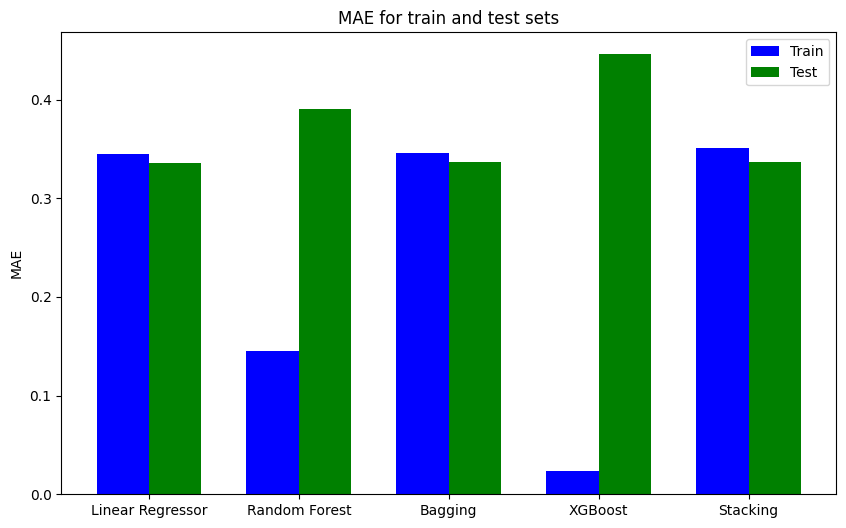

In [141]:
regressors = ['Linear Regressor', 'Random Forest', 'Bagging', 'XGBoost', 'Stacking']
MAE_train = [MAE_a_train, MAE_b_train, MAE_c_train, MAE_d_train, MAE_e_train]
MAE_test  = [MAE_a_test, MAE_b_test, MAE_c_test, MAE_d_test, MAE_e_test]

x = np.arange(len(regressors))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, MAE_train, width, color='blue', label='Train')
plt.bar(x + width/2, MAE_test, width, color='green', label='Test')
plt.xticks(x, regressors)
plt.ylabel('MAE')
plt.title('MAE for train and test sets')
plt.legend()
plt.show()

Από το διάγραμμα βλέπουμε ότι ο Linear Regressor, το Bagging και το Stacking έχουν παρόμοια απόδοση. Το σφάλμα στο train και το test είναι σχεδόν ίδιο, που σημαίνει ότι δεν κάνουν overfitting. Το αντίθετο συμβαίνει με το Random Forest και τον XGBoost, όπου το σφάλμα στα train data είναι αμελητέο, ενώ το σφάλμα στα test data είναι μεγαλύτερο από των υπόλοιπων αλγορίθμων. Ωστόσο, το σφάλμα των αλγορίθμων γενικά είναι μικρό συγκριτικά με τις τιμές που παίρνει ο USD index σε βάθος χρόνου.

## Ερώτημα 12

a) Προσθέτουμε τον μήνα και την ημέρα στα χαρακτηριστικά

In [142]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Date,Open,High,Low,Close,Month,Day
0,2020-11-03 00:00:00-05:00,94.050003,94.050003,93.290001,93.550003,11,3
1,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004,11,4
2,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,11,5
3,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,11,6
4,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,11,9


H ημερομηνία βοηθάει στην εκτίμηση των προβλέψεων γιατί χωρίς αυτήν το μοντέλο δεν καταλαβαίνει εποχιακές τάσεις στα δεδομένα και γενικά αγνοεί πλήρως την εξάρτηση του USD Index από περιοδικές μεταβολές μέσα στον χρόνο.

b) Φόρμουλα λογαριθμικών επιστροφών

Αποθήκευση των απόλυτων τιμών σε άλλο dataframe για το Ερώτημα 13

In [143]:
df_before = df[['Date','Open', 'High', 'Low', 'Close']].copy()

Ορισμός συνάρτησης με τον τύπο των λογαριθμικών επιστροφών και εφαρμογή στις στήλες του Dataframe

In [144]:
def log_returns(inputs):
    return np.log(inputs.shift(-1)/inputs)

df['Open'] = log_returns(df['Open'])
df['High'] = log_returns(df['High'])
df['Low'] = log_returns(df['Low'])
df['Close'] = log_returns(df['Close'])
df.head()

,Date,Open,High,Low,Close,Month,Day
0,2020-11-03 00:00:00-05:00,-0.010260,0.002655,-0.002146,-0.001498,11,3
1,2020-11-04 00:00:00-05:00,0.002682,-0.007985,-0.006466,-0.009466,11,4
2,2020-11-05 00:00:00-05:00,-0.008284,-0.007834,-0.003357,-0.003247,11,5
3,2020-11-06 00:00:00-05:00,-0.003571,0.001507,-0.000543,0.005407,11,6
4,2020-11-09 00:00:00-05:00,0.005622,0.000108,0.005089,0.000216,11,9


c) Ιστόγραμμα για κάθε χαρακτηριστικό

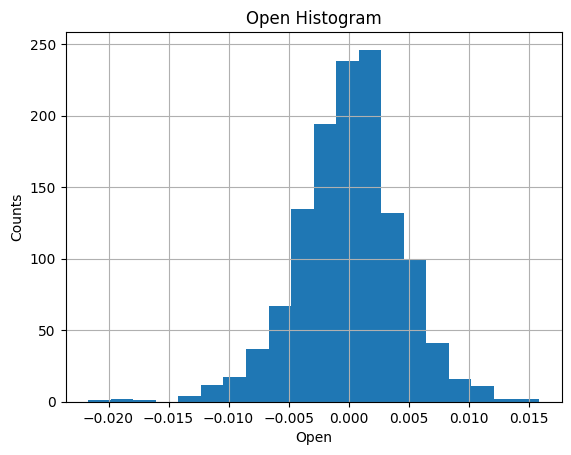

In [145]:
df['Open'].hist(bins=20)
plt.title('Open Histogram')
plt.xlabel('Open')
plt.ylabel('Counts')
plt.show()

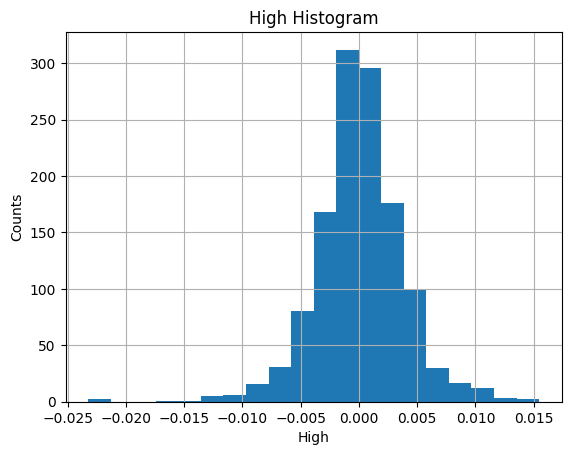

In [146]:
df['High'].hist(bins=20)
plt.title('High Histogram')
plt.xlabel('High')
plt.ylabel('Counts')
plt.show()

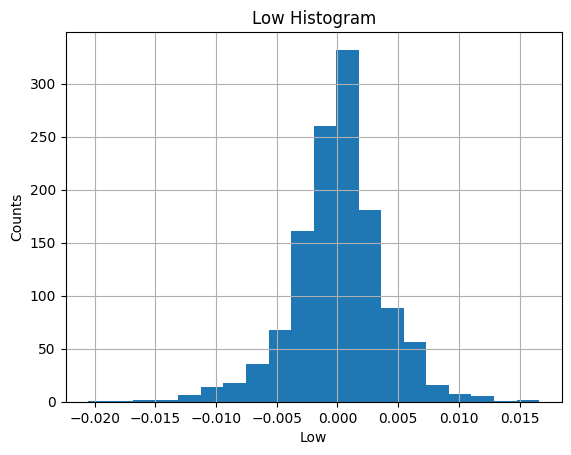

In [147]:
df['Low'].hist(bins=20)
plt.title('Low Histogram')
plt.xlabel('Low')
plt.ylabel('Counts')
plt.show()

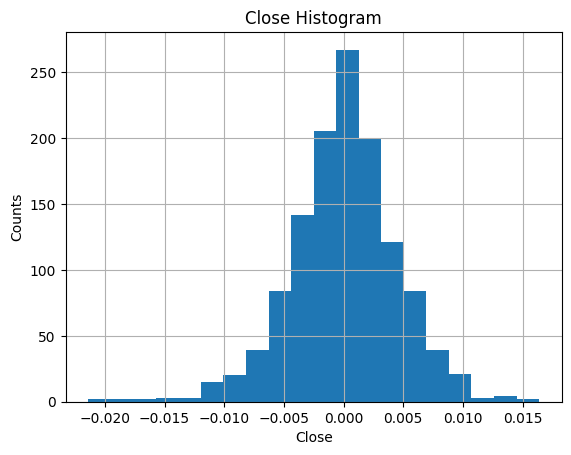

In [148]:
df['Close'].hist(bins=20)
plt.title('Close Histogram')
plt.xlabel('Close')
plt.ylabel('Counts')
plt.show()

Οι λογαριθμικές μεταβολές μπορεί να βελτιώσουν την απόδοση, διότι όπως είναι εμφανές από τα ιστογράμματα, οι μεταβολές έχουν κανονικοποιηθεί και ακολουθούν γκαουσιανή κατανομή, γεγονός που κάνει τα δεδομένα πιο φιλικά για επεξεργασία από έναν αλγόριθμο. Ακόμη, αν θέλουμε να προβλέψουμε την μεταβολή από t σε t+n χρόνο, αρκεί απλά να προσθέσουμε τις n λογαριθμικές επιστροφές, γεγονός που διευκολύνει πολύ τις προβλέψεις.

d)

Αν η τιμή Close της επόμενης μέρας είναι 0.01, σημαίνει ότι η τιμή του Close αυξήθηκε κατά 1%. Αν η τιμή του Ct είναι 0.95, αυτό σημαίνει ότι η τιμή την επόμενη μέρα είναι 0.95*1.01=0.9595.

e) Επανάηληψη των ερωτημάτων 7-11

In [149]:
train_n = df[df['Date'] < '2024-01-01']
test_n = df[df['Date'] >= '2024-01-01']

train_n = train_n.drop(columns=['Date'])
test_n = test_n.drop(columns=['Date'])

In [150]:
def close_function_new(df,N):

  df['Target'] = df['Close'].shift(-1)

  df = df.dropna().reset_index(drop=True)

  x = []
  y = []
  for i in range(len(df) - N + 1):

        x_i = df.iloc[i:i+N][['Open', 'High', 'Low', 'Close', 'Month', 'Day']].values

        y_i = df.iloc[i+N-1]['Target']

        x.append(x_i)
        y.append(y_i)


  x_np = np.array(x)
  y_np = np.array(y)

  return x_np, y_np

In [151]:
N=5
x_train_n, y_train_n = close_function_new(train_n, N)
x_test_n, y_test_n = close_function_new(test_n, N)

x_train_n = x_train_n.reshape(x_train_n.shape[0], N*6)
x_test_n = x_test_n.reshape(x_test_n.shape[0], N*6)

x_train_n.shape, y_train_n.shape

((789, 30), (789,))

In [152]:
lin_reg_n = LinearRegression()
lin_reg_n.fit(x_train_n,y_train_n)
ypred_a_train_n = lin_reg_n.predict(x_train_n)
ypred_a_test_n = lin_reg_n.predict(x_test_n)
MAE_a_train_n = mean_absolute_error(y_train_n, ypred_a_train_n)
MAE_a_test_n = mean_absolute_error(y_test_n, ypred_a_test_n)

In [153]:
seed = 0
forest_n = RandomForestRegressor(random_state=seed)
forest_n.fit(x_train_n,y_train_n)
ypred_b_train_n = forest_n.predict(x_train_n)
ypred_b_test_n = forest_n.predict(x_test_n)
MAE_b_train_n = mean_absolute_error(y_train_n, ypred_b_train_n)
MAE_b_test_n = mean_absolute_error(y_test_n, ypred_b_test_n)

In [154]:
bag_n = BaggingRegressor(estimator=LinearRegression(), random_state=seed)
bag_n.fit(x_train_n,y_train_n)
ypred_c_train_n = bag_n.predict(x_train_n)
ypred_c_test_n = bag_n.predict(x_test_n)
MAE_c_train_n = mean_absolute_error(y_train_n, ypred_c_train_n)
MAE_c_test_n = mean_absolute_error(y_test_n, ypred_c_test_n)

In [155]:
xgboost_n = xgb.XGBRegressor(random_state = seed)
xgboost_n.fit(x_train_n,y_train_n)
ypred_d_train_n = xgboost_n.predict(x_train_n)
ypred_d_test_n = xgboost_n.predict(x_test_n)
MAE_d_train_n = mean_absolute_error(y_train_n, ypred_d_train_n)
MAE_d_test_n = mean_absolute_error(y_test_n, ypred_d_test_n)

In [156]:
estimators = [('lin_reg', LinearRegression()), ('tree', DecisionTreeRegressor(random_state = seed))]
stack_n = StackingRegressor(estimators=estimators)
stack_n.fit(x_train_n, y_train_n)
ypred_e_train_n = stack_n.predict(x_train_n)
ypred_e_test_n = stack_n.predict(x_test_n)
MAE_e_train_n = mean_absolute_error(y_train_n, ypred_e_train_n)
MAE_e_test_n = mean_absolute_error(y_test_n, ypred_e_test_n)

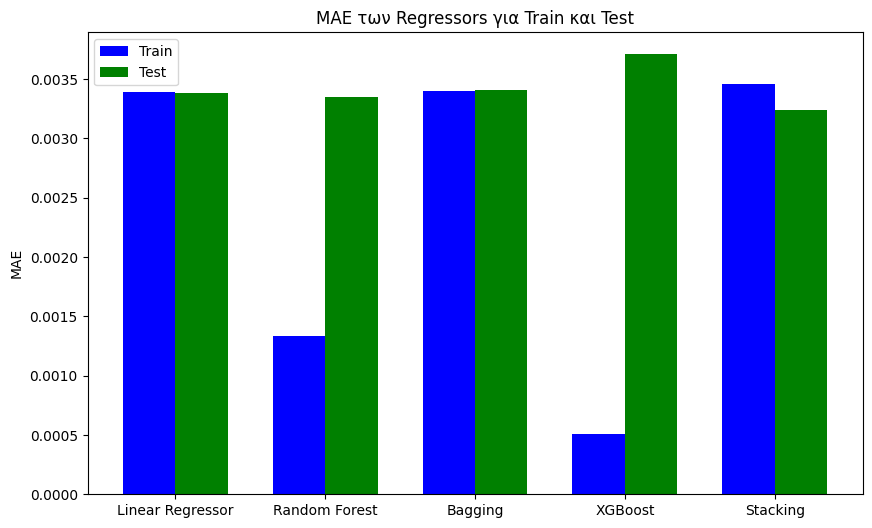

In [157]:
regressors = ['Linear Regressor', 'Random Forest', 'Bagging', 'XGBoost', 'Stacking']
MAE_train_n = [MAE_a_train_n, MAE_b_train_n, MAE_c_train_n, MAE_d_train_n, MAE_e_train_n]
MAE_test_n  = [MAE_a_test_n, MAE_b_test_n, MAE_c_test_n, MAE_d_test_n, MAE_e_test_n]

x = np.arange(len(regressors))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, MAE_train_n, width, color='blue', label='Train')
plt.bar(x + width/2, MAE_test_n, width, color='green', label='Test')
plt.xticks(x, regressors)
plt.ylabel('MAE')
plt.title('MAE των Regressors για Train και Test')
plt.legend()
plt.show()

## Ερώτημα 13

Dataframe που περιέχει τις τιμές πριν την μετατροπή σε λογαριθμικές επιστροφές

In [158]:
df_before.head()

,Date,Open,High,Low,Close
0,2020-11-03 00:00:00-05:00,94.050003,94.050003,93.290001,93.550003
1,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004
2,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
3,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
4,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003


Απομονώνουμε τα test data από αυτό το dataframe

In [159]:
test_before = df_before[df_before['Date'] >= '2024-01-01']
test_before = test_before.drop(columns=['Date'])
test_before.head()

,Open,High,Low,Close
794,101.419998,102.250000,101.339996,102.199997
795,102.150002,102.730003,102.080002,102.459999
796,102.459999,102.529999,102.150002,102.419998
797,102.400002,103.099998,101.910004,102.410004
798,102.440002,102.620003,102.080002,102.209999


Λύνουμε ως προς Ct+1 για να επαναφέρουμε τα δεδομένα σε απόλυτες τιμές με την μετατροπή y_t+1 = y_t*e^y_t. Από τον πίνακα test_before θα πρέπει να πάρουμε μόνο τις τιμές που αντιστοιχούν στις μέρες για τις οποίες υπολογίζεται το close της επόμενης μέρας. Για τις πρώτες 5 μέρες δεν υπάρχει τέτοια τιμή, αφού δεν μπορεί να σχηματιστεί το αντίστοιχο timeframe.

Καλύτερο μοντέλο σύμφωνα με το ραβδόγραμμα των MAE είναι το Stacking με μικρή διαφορά από τα υπόλοιπα.

In [160]:
C_t = test_before['Close'].values[N-1 : N-1 + len(y_test_n)]
C_true = C_t * np.exp(y_test_n)
C_pred = C_t * np.exp(ypred_e_test_n)

fig = go.Figure()

fig.add_trace(go.Scatter(y=C_pred, name='C_pred'))
fig.add_trace(go.Scatter(y=C_true, name='C_true'))


fig.show()

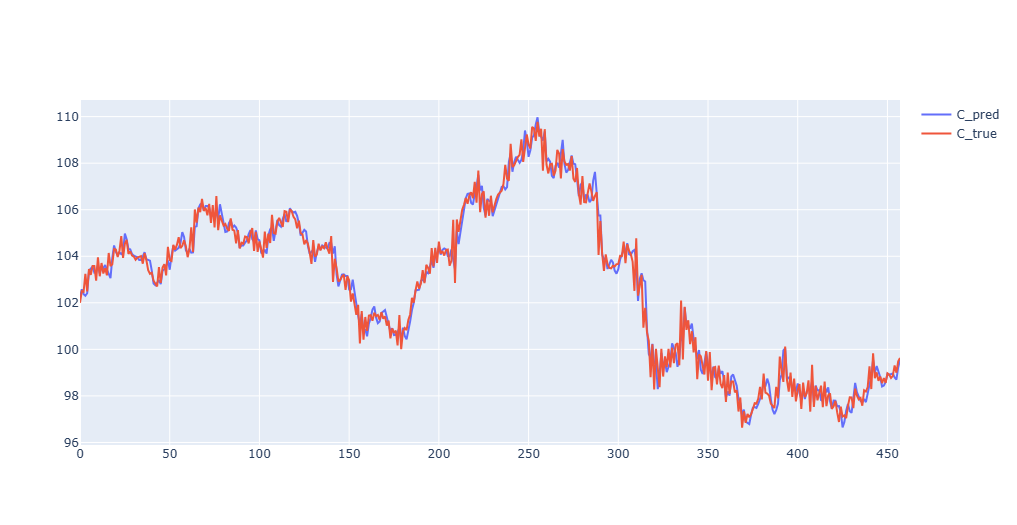

Από το διάγραμμα βλέπουμε ότι σε γενικές γραμμές, οι προβλέψεις του μοντέλου είναι πολύ κοντά στις πραγματικές. Μερικές φορές δεν καταφέρνει να προβλέψει κάποιες ακραίες μεταβολές από ημέρα σε ημέρα, αλλά σε βάθος χρόνου η απόκλιση εξομαλύνεται.